In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, restoration, filters#, feature
from PIL import Image
from ipywidgets import interact, widgets


# Modules
from RICM_VESICLE import RICM
from FITTING import Fit_Gaussian

# Functions
def avg_movie(movie, l=2, show_dim=True):
    
    # Average each l frames
    movie_consecutive = []
    for i in range(int(movie.shape[0]/l)):
        movie_consecutive.append(np.mean(movie[l*i:l*(i+1)], axis=0))

    # Transform the movie into numpy array
    movie_consecutive = np.array(movie_consecutive)
    
    # Show the dimension reduction
    if show_dim == True:
        print("{} --> {}".format(movie.shape, movie_consecutive.shape))
    
    return movie_consecutive

shot 2, GUV 0 not found
(200, 261, 274) --> (33, 261, 274)
shot 2, GUV 2 not found
shot 2, GUV 3 not found
shot 3, GUV 0 not found
(200, 348, 342) --> (33, 348, 342)
(200, 112, 115) --> (33, 112, 115)
(200, 111, 120) --> (33, 111, 120)
shot 4, GUV 0 not found
(200, 206, 214) --> (33, 206, 214)
(200, 209, 208) --> (33, 209, 208)
shot 4, GUV 3 not found
shot 5, GUV 0 not found
(200, 233, 223) --> (33, 233, 223)
(200, 149, 146) --> (33, 149, 146)
shot 5, GUV 3 not found
shot 6, GUV 0 not found
(255, 273) --> (42, 273)
shot 6, GUV 1 not found
(240, 243) --> (40, 243)
shot 6, GUV 2 not found
(171, 186) --> (28, 186)
shot 6, GUV 3 not found
shot 7, GUV 0 not found
(200, 276, 281) --> (33, 276, 281)
shot 7, GUV 2 not found
shot 7, GUV 3 not found


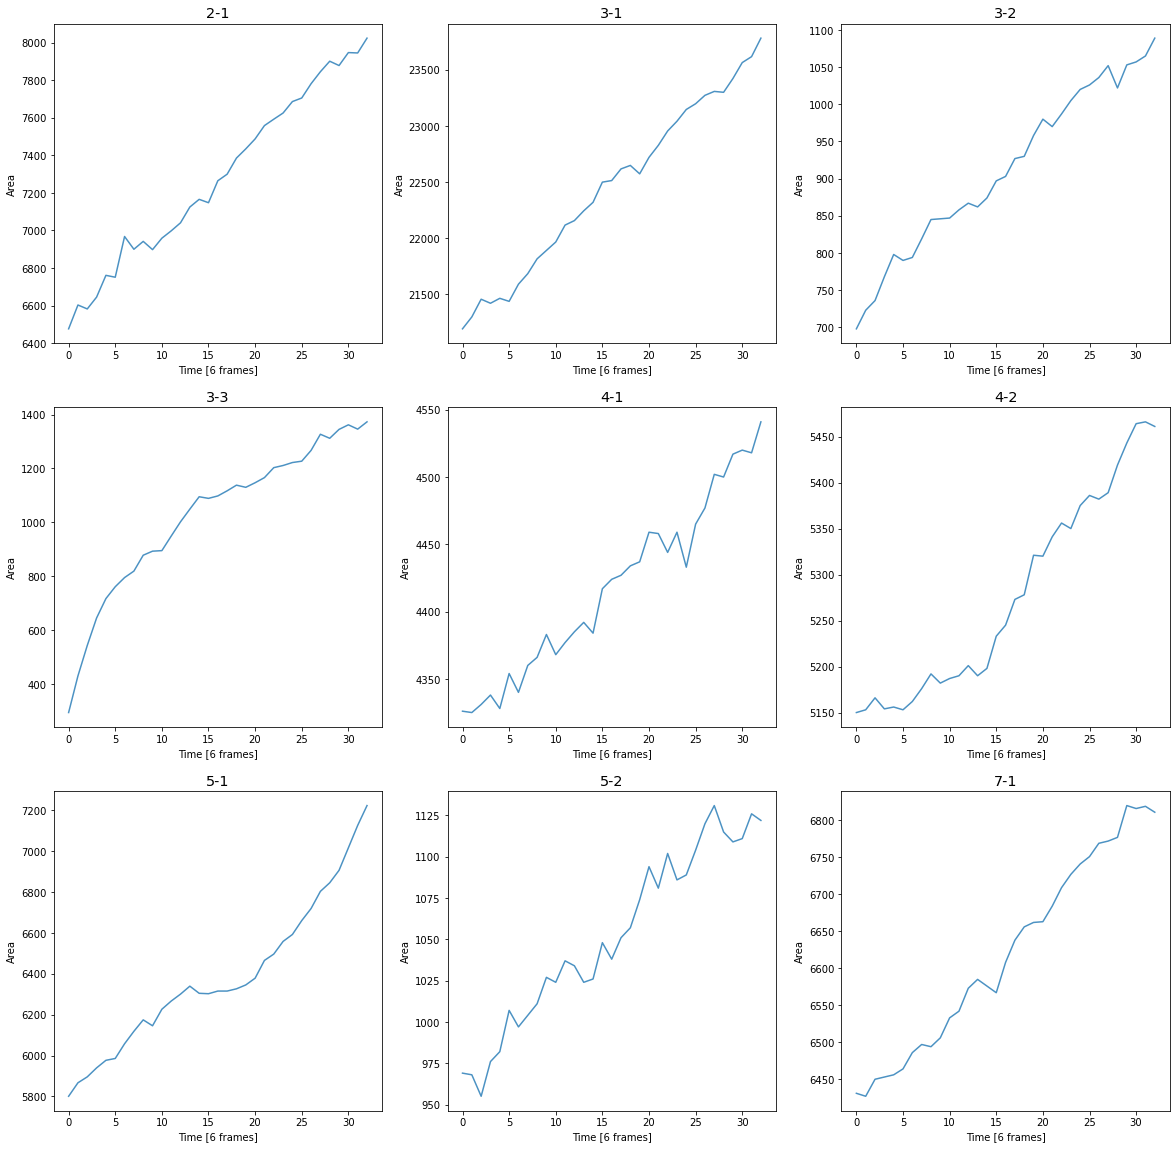

In [2]:
plt.figure(figsize=(20, 20))

z = 1
# Iterate on each Shot and GUV
for SHOT in range(2,8):
    for GUV in range(4):
        try:
            # Read the image
            guv = io.imread("20201216_Ecad_dynamics/data/Calib_camera{}-{}.tif".format(SHOT, GUV))

            # Subtract the base line
            guv = guv - 310

            # Take a cosecutive average of the movie
            guv_consecutive = avg_movie(guv, l=6)

            #Estimating the noise variance of the image
            sigma_est = np.mean(restoration.estimate_sigma(guv_consecutive[0] , multichannel = False))

            # Get the area of each frame in the averaged movie
            area = []
            for i in range(guv_consecutive.shape[0]):

                #Apply the Non-local means denoising algorithm
                img_denoised = restoration.denoise_nl_means(guv_consecutive[i], h = sigma_est,fast_mode = True,
                                                            patch_size = 10,
                                                            patch_distance = 20,
                                                            multichannel = False)

                # Compute the area
                area.append((1 - np.multiply(img_denoised > filters.threshold_otsu(img_denoised), 1)).sum())

            # Transform the area into normalized numpy array
            area = np.array(area)
            #area = area/area.max()

            # Plot the curve
            plt.subplot(3,3,z)
            plt.plot(area, label = '{}_{}'.format(SHOT, GUV), alpha = 0.8)
            plt.title('{}-{}'.format(SHOT, GUV), fontsize= 'x-large')
            plt.xlabel('Time [6 frames]')
            plt.ylabel('Area')
            
            # Change to the next subplot
            z += 1
            
        except:
            print('shot {}, GUV {} not found'.format(SHOT, GUV))

# Save the figure
plt.savefig('Area_individual_curves.png')
plt.show();

shot 2, GUV 0 not found
(200, 261, 274) --> (33, 261, 274)
shot 2, GUV 2 not found
shot 2, GUV 3 not found
shot 3, GUV 0 not found
(200, 348, 342) --> (33, 348, 342)
(200, 112, 115) --> (33, 112, 115)
(200, 111, 120) --> (33, 111, 120)
shot 4, GUV 0 not found
(200, 206, 214) --> (33, 206, 214)
(200, 209, 208) --> (33, 209, 208)
shot 4, GUV 3 not found
shot 5, GUV 0 not found
(200, 233, 223) --> (33, 233, 223)
(200, 149, 146) --> (33, 149, 146)
shot 5, GUV 3 not found
shot 6, GUV 0 not found
(255, 273) --> (42, 273)
shot 6, GUV 1 not found
(240, 243) --> (40, 243)
shot 6, GUV 2 not found
(171, 186) --> (28, 186)
shot 6, GUV 3 not found
shot 7, GUV 0 not found
(200, 276, 281) --> (33, 276, 281)
shot 7, GUV 2 not found
shot 7, GUV 3 not found


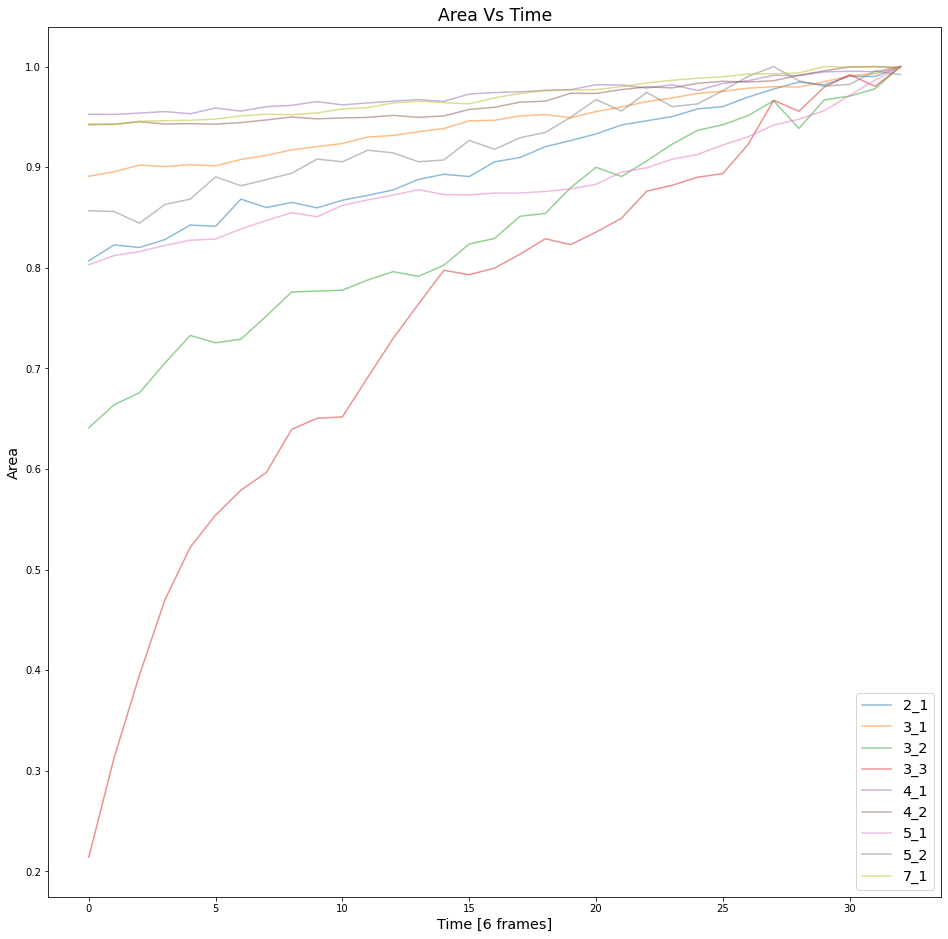

In [3]:
plt.figure(figsize=(16, 16))

# Iterate on each Shot and GUV
for SHOT in range(2,8):
    for GUV in range(4):
        try:
            # Read the image
            guv = io.imread("20201216_Ecad_dynamics/data/Calib_camera{}-{}.tif".format(SHOT, GUV))

            # Subtract the base line
            guv = guv - 310

            # Take a cosecutive average of the movie
            guv_consecutive = avg_movie(guv, l=6)

            #Estimating the noise variance of the image
            sigma_est = np.mean(restoration.estimate_sigma(guv_consecutive[0] , multichannel = False))

            # Get the area of each frame in the averaged movie
            area = []
            for i in range(guv_consecutive.shape[0]):

                #Apply the Non-local means denoising algorithm
                img_denoised = restoration.denoise_nl_means(guv_consecutive[i], h = sigma_est,fast_mode = True,
                                                            patch_size = 10,
                                                            patch_distance = 20,
                                                            multichannel = False)

                # Compute the area
                area.append((1 - np.multiply(img_denoised > filters.threshold_otsu(img_denoised), 1)).sum())

            # Transform the area into normalized numpy array
            area = np.array(area)
            area = area/area.max()

            # Plot the curve
            plt.plot(area, label = '{}_{}'.format(SHOT, GUV), alpha = 0.5)
        
        except:
            print('shot {}, GUV {} not found'.format(SHOT, GUV))

# Put the figure details
plt.title('Area Vs Time', fontsize= 'xx-large')
plt.xlabel('Time [6 frames]', fontsize= 'x-large')
plt.ylabel('Area', fontsize= 'x-large')
plt.legend(loc='lower right', fontsize= 'x-large')

# Save the figure
plt.savefig('Area_curves.png')
plt.show();

(200, 276, 281) --> (33, 276, 281)


<Figure size 1080x360 with 0 Axes>

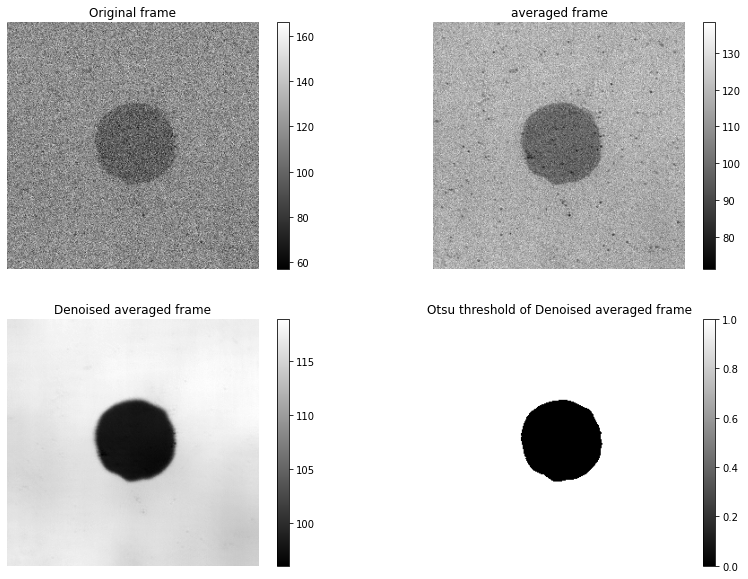

In [4]:
frame, L = 0, 6

# Take a cosecutive average of the movie
guv_consecutive = avg_movie(guv, l=L)

#Estimating the noise variance of the image
sigma_est = np.mean(restoration.estimate_sigma(guv_consecutive[0] , multichannel = False))

#Apply the Non-local means denoising algorithm
img_denoised = restoration.denoise_nl_means(guv_consecutive[frame], h = sigma_est,fast_mode = True,
                                            patch_size = 10,
                                            patch_distance = 20,
                                            multichannel = False)
# display the denoised image and it's histogram
plt.figure(figsize=(15,5))

# display the image and it's histogram
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.axis('off')
plt.title('Original frame')
plt.imshow(guv[frame*L], cmap = "gray")
plt.colorbar()

plt.subplot(222)
plt.axis('off')
plt.title('averaged frame')
plt.imshow(guv_consecutive[frame], cmap = "gray")
plt.colorbar()
    
plt.subplot(223)
plt.axis('off')
plt.title('Denoised averaged frame')
plt.imshow(img_denoised, cmap = 'gray')
plt.colorbar()
    
plt.subplot(224)
plt.axis('off')
plt.title('Otsu threshold of Denoised averaged frame')
plt.imshow(np.multiply(img_denoised > filters.threshold_otsu(img_denoised), 1), cmap = 'gray')
plt.colorbar();